In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
dataset = dataset.drop(["Unnamed: 0", "id"], axis=1)
testdata = testdata.drop(["Unnamed: 0", "id"], axis=1)

In [4]:
dataset = dataset.replace("neutral or dissatisfied", value=0, regex=True)
dataset = dataset.replace("satisfied", value=1, regex=True)
dataset["satisfaction"] = pd.to_numeric(dataset["satisfaction"]) #to cahnge datatype

In [5]:
testdata = testdata.replace("neutral or dissatisfied", value=0, regex=True)
testdata = testdata.replace("satisfied", value=1, regex=True)
testdata["satisfaction"] = pd.to_numeric(testdata["satisfaction"])

In [6]:
dataset.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,...,1,1,1,4,4,3,1,0,0.0,0


In [7]:
testdata.isna().sum()
testdata.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000,25976.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857,0.438982
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539,0.496272
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [9]:
dataset.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

In [10]:
dataset.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [11]:
dataset.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


<AxesSubplot:>

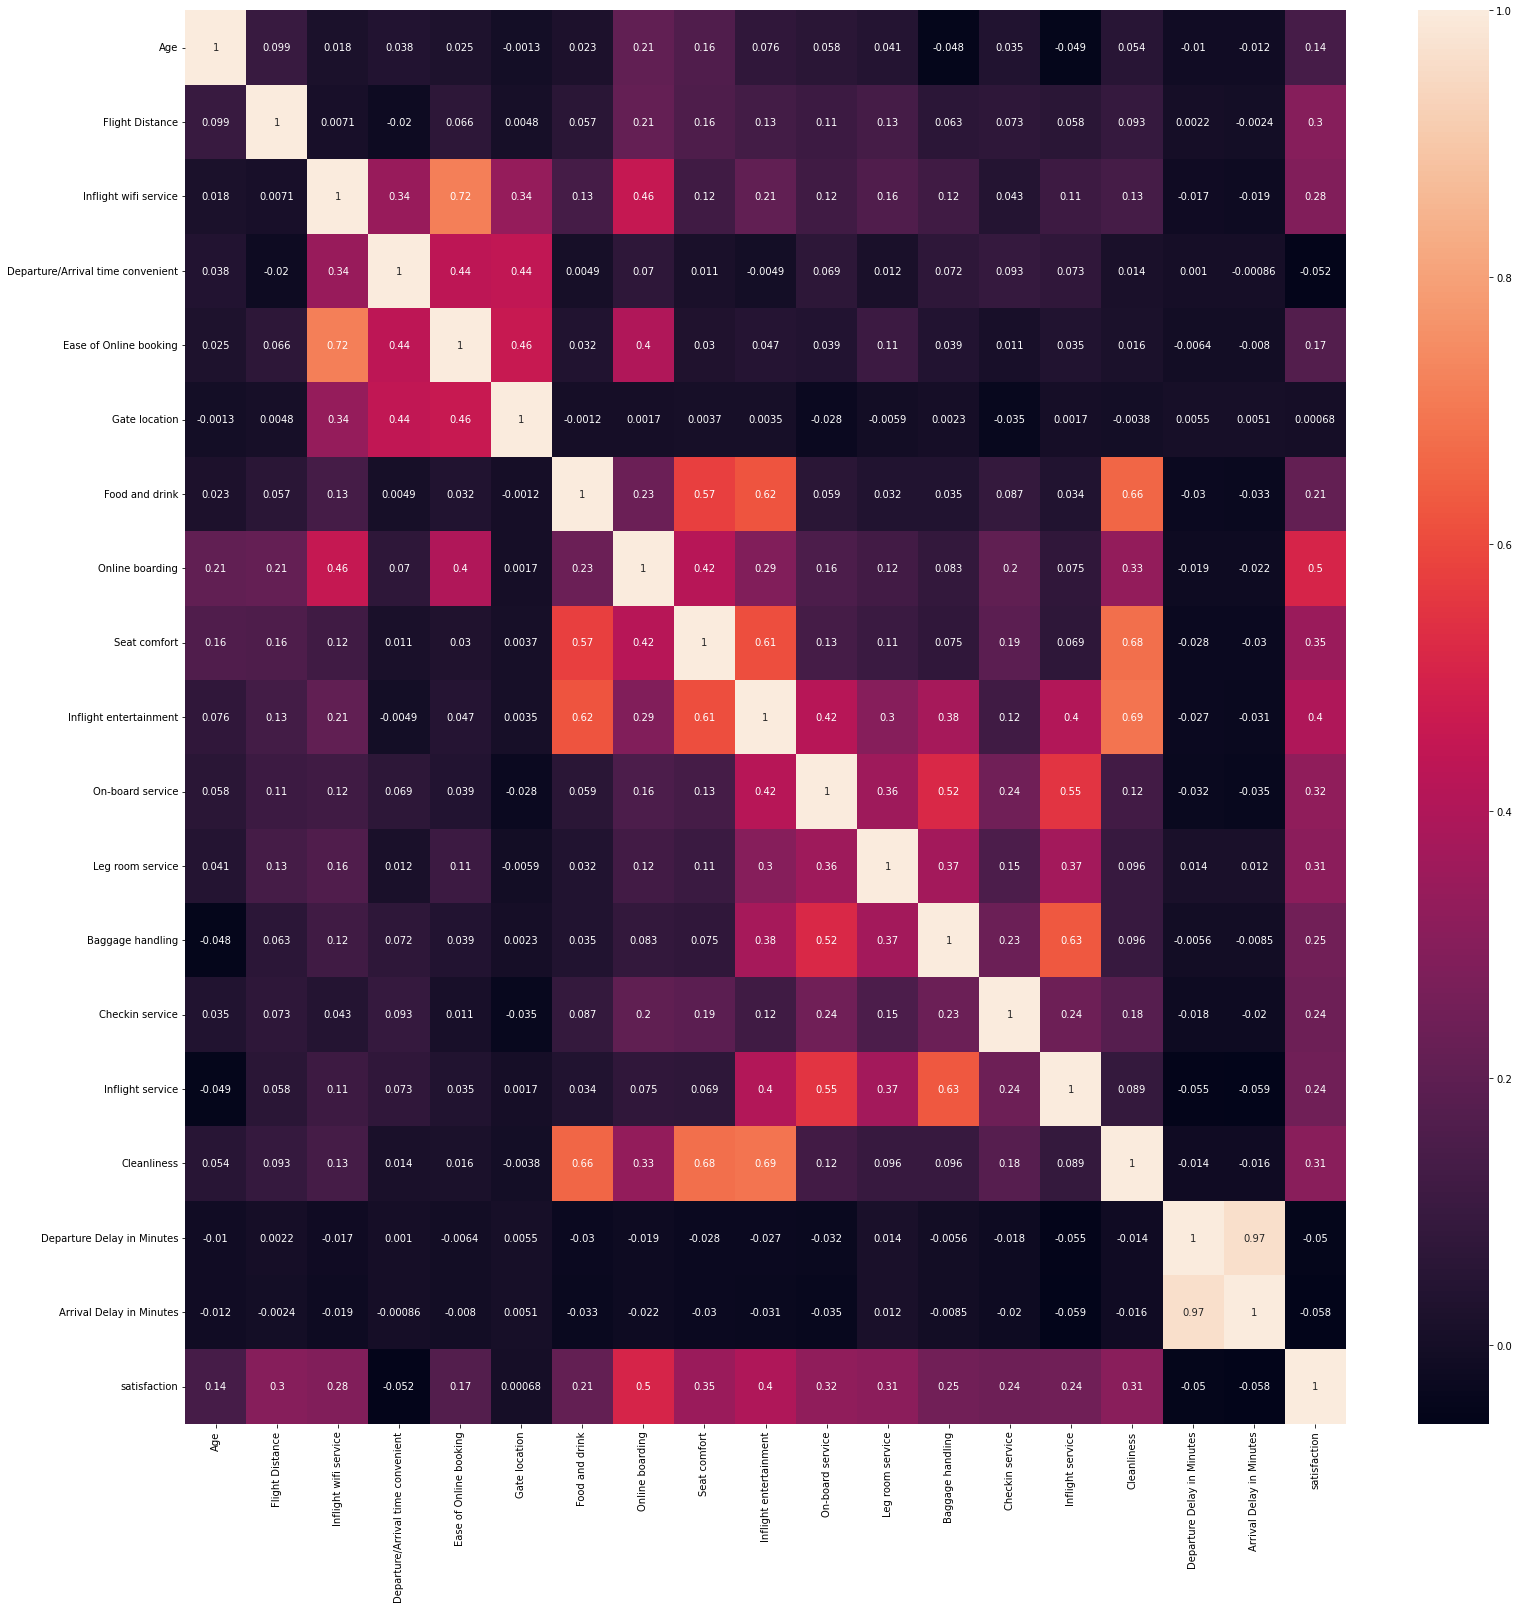

In [12]:
corm = dataset.corr()
plt.figure(figsize=(26,26))
sns.heatmap(corm, annot=True)

In [13]:
dataset = dataset.drop(["Arrival Delay in Minutes", "Departure Delay in Minutes", "Gate location", "Departure/Arrival time convenient"], axis=1)
testdata = testdata.drop(["Arrival Delay in Minutes", "Departure Delay in Minutes", "Gate location", "Departure/Arrival time convenient"], axis=1)

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Gender                  103904 non-null  object
 1   Customer Type           103904 non-null  object
 2   Age                     103904 non-null  int64 
 3   Type of Travel          103904 non-null  object
 4   Class                   103904 non-null  object
 5   Flight Distance         103904 non-null  int64 
 6   Inflight wifi service   103904 non-null  int64 
 7   Ease of Online booking  103904 non-null  int64 
 8   Food and drink          103904 non-null  int64 
 9   Online boarding         103904 non-null  int64 
 10  Seat comfort            103904 non-null  int64 
 11  Inflight entertainment  103904 non-null  int64 
 12  On-board service        103904 non-null  int64 
 13  Leg room service        103904 non-null  int64 
 14  Baggage handling        103904 non-n

<AxesSubplot:>

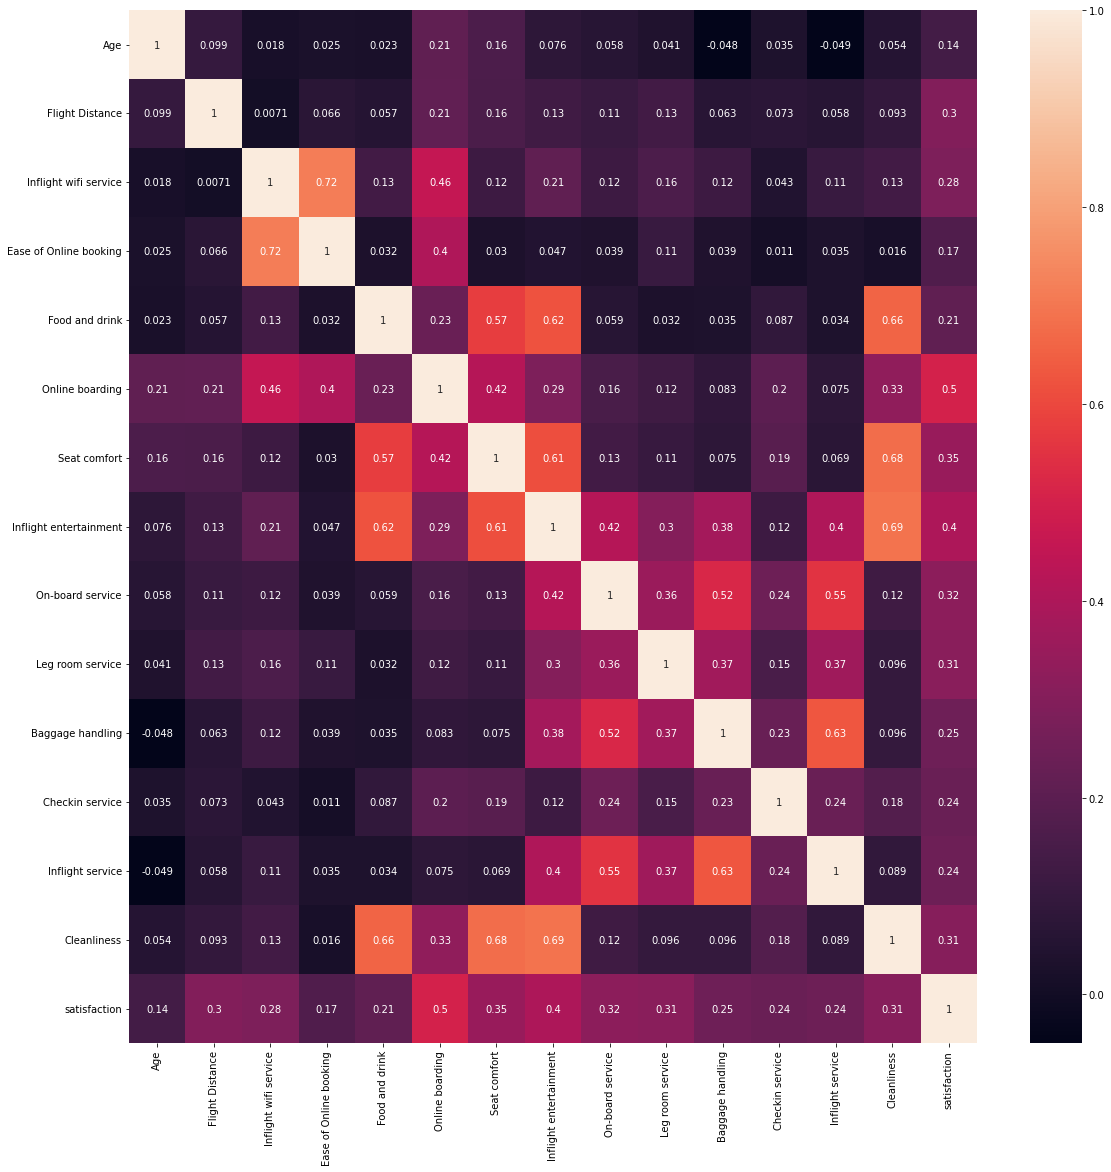

In [15]:
corm = dataset.corr()
plt.figure(figsize=(19,19))
sns.heatmap(corm, annot=True)

In [16]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_test = testdata.iloc[:, :-1].values
y_test = testdata.iloc[:, -1].values

In [17]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="most_frequent")
si.fit(X[:, 17:18])
si.fit(X_test[:, 17:18])
X[:, 17:18] = si.transform(X[:, 17:18])
X_test[:, 17:18] = si.transform(X_test[:, 17:18])

In [18]:
np.isnan(np.min(X[:, 17:18])) 

False

In [19]:
print(list(dataset.columns))

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


In [20]:
catcol = []
for i in list(dataset.columns):
    if dataset[i].dtype == "object":
        catcol.append(i)

In [21]:
catcol

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Gender                  103904 non-null  object
 1   Customer Type           103904 non-null  object
 2   Age                     103904 non-null  int64 
 3   Type of Travel          103904 non-null  object
 4   Class                   103904 non-null  object
 5   Flight Distance         103904 non-null  int64 
 6   Inflight wifi service   103904 non-null  int64 
 7   Ease of Online booking  103904 non-null  int64 
 8   Food and drink          103904 non-null  int64 
 9   Online boarding         103904 non-null  int64 
 10  Seat comfort            103904 non-null  int64 
 11  Inflight entertainment  103904 non-null  int64 
 12  On-board service        103904 non-null  int64 
 13  Leg room service        103904 non-null  int64 
 14  Baggage handling        103904 non-n

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 1, 3, 4])], remainder = "passthrough")
X = np.array(ct.fit_transform(X))
X_test = np.array(ct.fit_transform(X_test))

In [24]:
X.shape

(103904, 23)

In [25]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = xg.predict(X_test)
c = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.9632352941176471


In [27]:
from sklearn.model_selection import cross_val_score
ac = cross_val_score(estimator=xg, X=X, y=y, cv = 10)
print(ac.mean()*100)

96.23979772974855


In [28]:
print(c)

[[14277   296]
 [  659 10744]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X, y)
y_predrf = rf.predict(X_test)

In [30]:
print(accuracy_score(y_test, y_predrf))

0.9620418848167539


In [31]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(X, y)
y_predcb = cb.predict(X_test)

Learning rate set to 0.074823
0:	learn: 0.5922774	total: 176ms	remaining: 2m 56s
1:	learn: 0.5152038	total: 198ms	remaining: 1m 38s
2:	learn: 0.4282964	total: 219ms	remaining: 1m 12s
3:	learn: 0.3823662	total: 238ms	remaining: 59.2s
4:	learn: 0.3331515	total: 260ms	remaining: 51.7s
5:	learn: 0.3108451	total: 280ms	remaining: 46.3s
6:	learn: 0.2898853	total: 306ms	remaining: 43.4s
7:	learn: 0.2706801	total: 325ms	remaining: 40.3s
8:	learn: 0.2561294	total: 342ms	remaining: 37.7s
9:	learn: 0.2440104	total: 409ms	remaining: 40.5s
10:	learn: 0.2284847	total: 428ms	remaining: 38.5s
11:	learn: 0.2176763	total: 460ms	remaining: 37.9s
12:	learn: 0.2119087	total: 481ms	remaining: 36.5s
13:	learn: 0.2050642	total: 501ms	remaining: 35.3s
14:	learn: 0.1981427	total: 516ms	remaining: 33.9s
15:	learn: 0.1905678	total: 531ms	remaining: 32.7s
16:	learn: 0.1867729	total: 546ms	remaining: 31.6s
17:	learn: 0.1824309	total: 562ms	remaining: 30.7s
18:	learn: 0.1794819	total: 579ms	remaining: 29.9s
19:	lear

In [32]:
print(accuracy_score(y_test, y_predcb))

0.9634662765629812


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)
y_predk = knn.predict(X_test) 

In [34]:
print(accuracy_score(y_test, y_predk))

0.8122497690175546


In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X, y)
y_prednb = nb.predict(X_test)

In [36]:
print(accuracy_score(y_test, y_prednb))

0.8458192177394518


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X, y)
y_preddt = dt.predict(X_test)

In [38]:
print(accuracy_score(y_test, y_preddt))

0.9417154296273483
